Добро пожаловать в 2912 год, где ваши навыки работы с данными необходимы для разгадки космической тайны. Мы получили сообщение с расстояния в четыре световых года, и все выглядит не очень хорошо.

Космический корабль "Титаник" был межзвездным пассажирским лайнером, спущенным на воду месяц назад. С почти 13 000 пассажирами на борту судно отправилось в свой первый рейс, перевозя эмигрантов из нашей Солнечной системы к трем недавно пригодным для жизни экзопланетам, вращающимся вокруг близлежащих звезд.

Огибая Альфу Центавра по пути к своему первому пункту назначения — жаркой 55—й орбите Рака - неосторожный космический корабль "Титаник" столкнулся с пространственно-временной аномалией, скрытой в пылевом облаке. К сожалению, его постигла та же участь, что и его тезку 1000 лет назад. Хотя корабль остался цел, почти половина пассажиров была перенесена в другое измерение!

В этом соревновании ваша задача - предсказать, был ли пассажир перенесен в альтернативное измерение во время столкновения космического корабля "Титаник" с пространственно-временной аномалией. Чтобы помочь вам сделать эти прогнозы, вам предоставляется набор личных записей, восстановленных из поврежденной компьютерной системы корабля.


Для более подробной информации смотри [ссылку](https://www.kaggle.com/competitions/spaceship-titanic/data).

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Проект/SpaceShip Titanic | Kaggle/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Проект/SpaceShip Titanic | Kaggle/test.csv")

In [ ]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Изучение структуры данных

Проверим, насколько сбалансирован dataset по отношению к данным столбца 'Transported'.

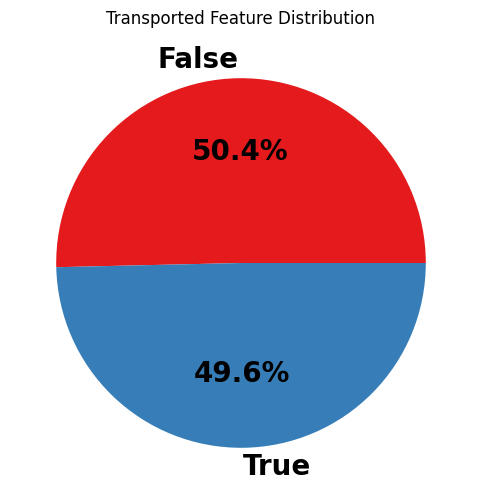

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(train_df["Transported"].value_counts(),labels=train_df["Transported"].value_counts().keys()[::-1],autopct="%1.1f%%",
       textprops={"fontsize":20,"fontweight":"black"},colors=sns.color_palette("Set1"))
plt.title("Transported Feature Distribution");

Данные сбалансированы, следовательно различные виды сэмплирования применять не нужно. Далее посмотрим, какие столбцы необработанных данных наиболее тесно связаны с значениями столбца 'Transported'.

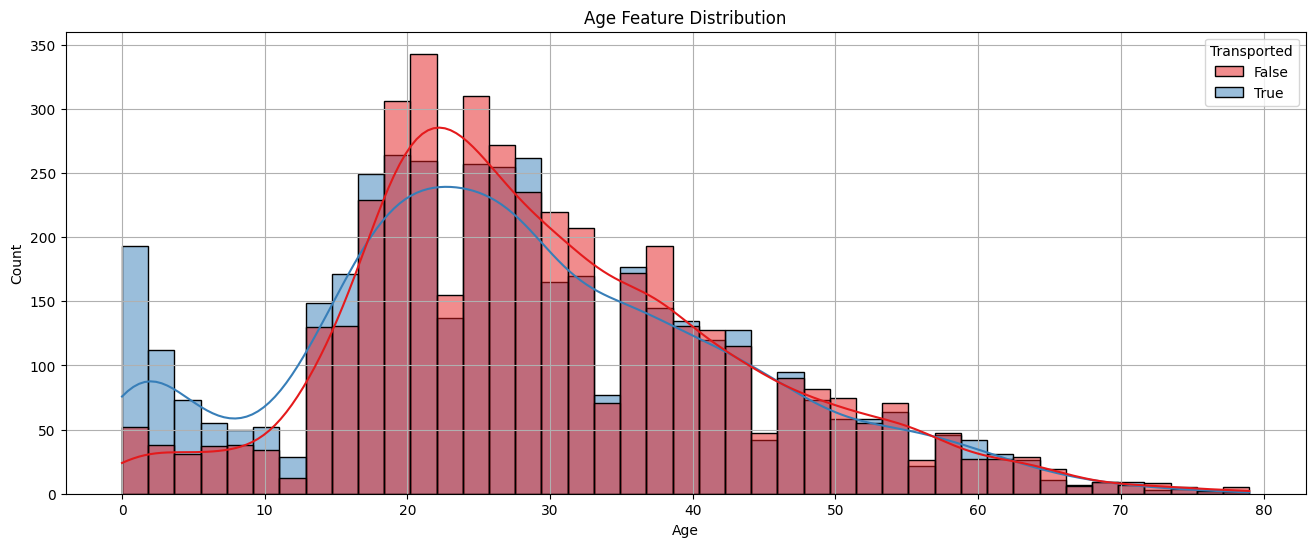

In [ ]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set1")
plt.title("Age Feature Distribution");
plt.grid()

Можем заметить следующие особенности:

*   Значение 'True' в столбце 'Transported' у детей до (примерно) 18 лет преобладает над значением 'False';
*   Значение 'False' в столбце 'Transported' у взрослых от 18 до 44 преобладает над значением 'True';
*   У пассажиров старше 44 количество значений 'False' и 'True' примерно равно.


Таким образом, выделим 3 категории пассажиров в соответствии с распределем на диаграмме выше возьмем примерные границы разделения - 18 лет и 44 года.

In [ ]:
def age_group(age):
  if age==None:
    return "NONE"
  elif age < 18:
    return "YOUNG"
  elif age < 44:
    return "ADULT"
  else: return "ELDERY"

In [ ]:
train_df['AgeGroup'] = train_df['Age'].apply(lambda age: age_group(age))
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,ADULT
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,ADULT
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,ELDERY
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,ADULT
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,YOUNG


Посмотрим на распределение данных колонок 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'.

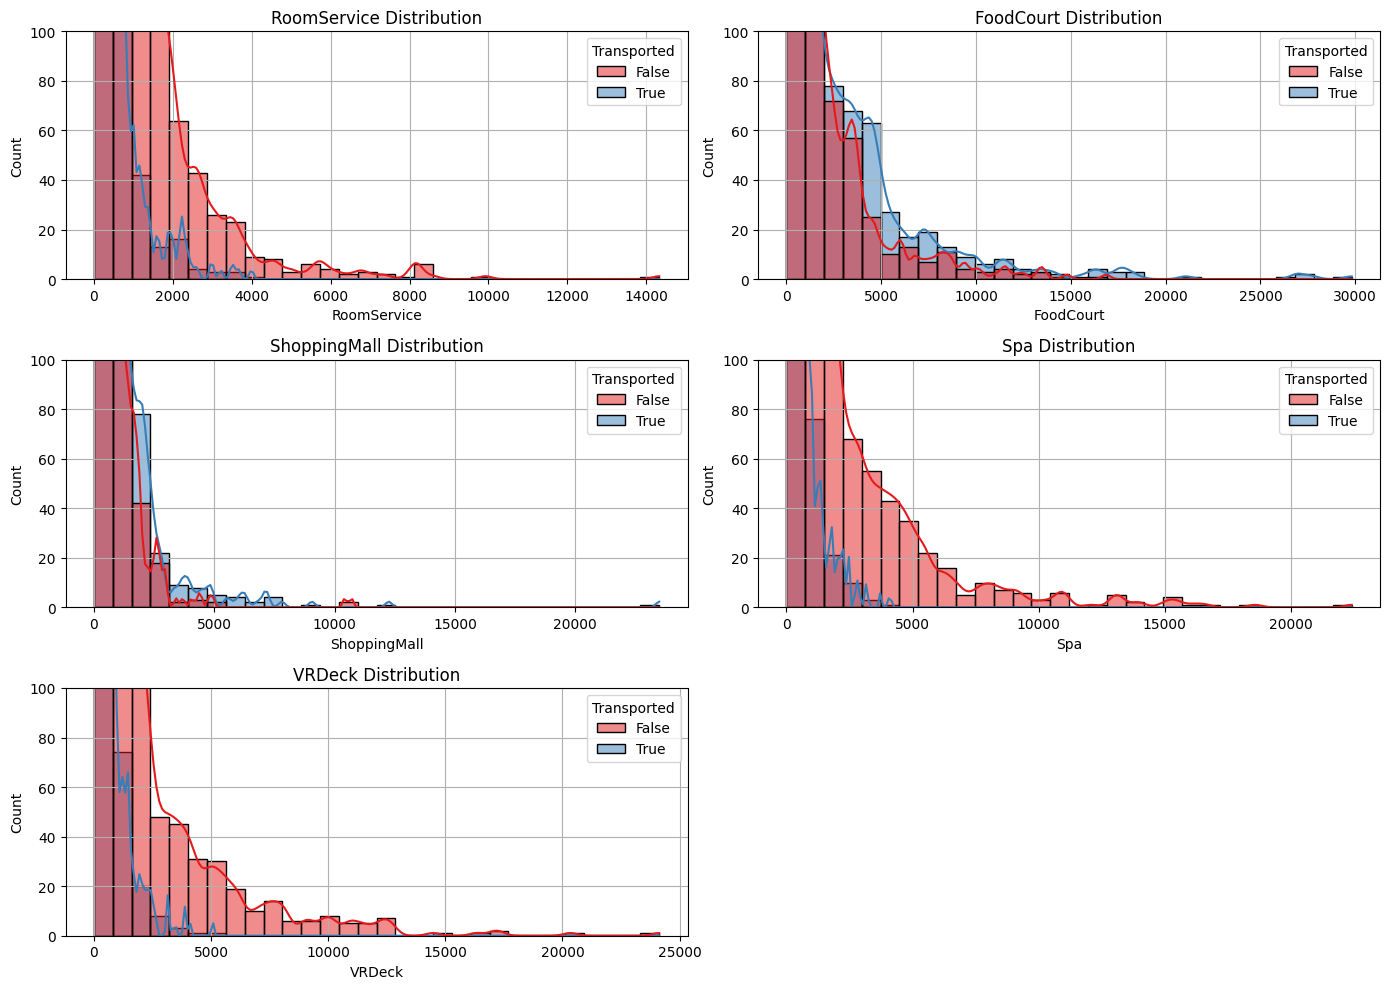

In [ ]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set1")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.grid()
    plt.tight_layout()

Можем заметить, что проведение времени на FoodCourt и ShoppingMall повышает вероятность транспортировки пассажира во время крушения лайнера, а такие развлечения как Spa, VRDeck и RoomService, наоборот, понижают эту вероятность.

Помимо этого, обратим внимание, что многие пассажиры не пользовались дополнительными услугами космического корабля, либо пользовались в ограниченном количестве.

Добавим 2 столбца: Shopping&FoodCourt и RoomService&VRDeck&Spa, в которых будет записана сумма трат соответствующих столбцов. Затем проведем их дискретизацию по квантилям.

NB Стоит учесть тот факт, что в складываемых столбцах присутствуют пропуски (не всегда в одних и тех же строчках), поэтому пропусков в Shopping&FoodCourt и RoomService&VRDeck&Spa будет больше или равно чем в каждом отдельно взятом столбце FoodCourt, ShoppingMall и тд. где разумно заменить NaN на 0.

In [ ]:
train_df['Shopping&FoodCourt'] = train_df['ShoppingMall'].fillna(0)+train_df['FoodCourt'].fillna(0)
train_df['RoomService&VRDeck&Spa'] = train_df['RoomService'].fillna(0)+train_df['VRDeck'].fillna(0)+train_df['Spa'].fillna(0)

Посмотрим, какой теперь вид имеет распределение столбцов Shopping&FoodCourt и RoomService&VRDeck&Spa.

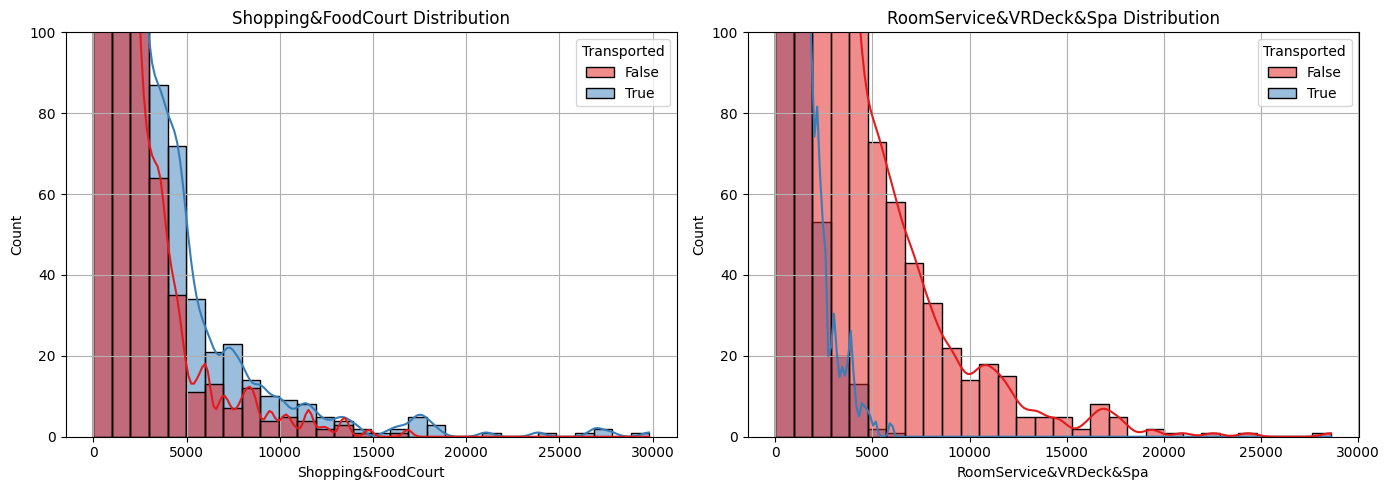

In [ ]:
exp_cols = ["Shopping&FoodCourt","RoomService&VRDeck&Spa"]

plt.figure(figsize=(14,5))
for idx,column in enumerate(exp_cols):
    plt.subplot(1,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set1")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.grid()
    plt.tight_layout()

Ниже приведена функция, позволяющая проводить количественную дискретизацию признаков по уровням квантилей.

In [ ]:
def quantile_discretization(df, name_column, quantile_levels = [0.0, 0.25, 0.5, 0.75, 1], group_names = ['GROUP_1', 'GROUP_2', 'GROUP_3', 'GROUP_4']):
  '''
    df: dataframe
    name_column: the name of the numeric column to be sampled
    quantile_levels: an array of quantile levels by which to divide column data 'column_name'
    group_names: the name of the ranges into which the 'column_name' data will be sampled

    return: series with the sampling result; array of groups' name
  '''
  if name_column not in df.columns: return
  sampled_series = pd.qcut(x = df[name_column], q = quantile_levels, duplicates='drop')

  return sampled_series.replace(sampled_series.unique(), group_names[:len(sampled_series.unique())])


Продублируем действия выше внутри одного метода data_analysis, чтобы в дальнейшем аналогично обработать test_df.

In [ ]:
def data_analysis(df):
  df['AgeGroup'] = df['Age'].apply(lambda age: age_group(age))
  df['Shopping&FoodCourt'] = df['ShoppingMall'].fillna(0)+df['FoodCourt'].fillna(0)
  df['RoomService&VRDeck&Spa'] = df['RoomService'].fillna(0)+df['VRDeck'].fillna(0)+df['Spa'].fillna(0)
  return df

In [ ]:
test_df = data_analysis(test_df)

# Анализ качества данных

Подсчитаем количество пропусков в каждом столбце.

In [ ]:
missing_val_count_by_column = (train_df.isnull().sum())
print(train_df.shape)
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(8693, 17)
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


Количество пропусков в каждом отдельном столбце небольшое - около 2,5%.

Изучим подробнее информацию о столбцах датафрейма и сделаем некоторые предположения об их дальнейшей обработке:


*   **PassengerId**: состоит из 2х чисел вида gggg_pp, где gggg - номер группы, а pp - номер пассажира в этой группе (родственники находятся либо в одной, либо в ближайших группах); разделим столбец на 2: gggg и pp, а затем заменим их одним - порядковым номером пассажира на борту

*   **HomePlanet**: применим к данному столбцу one_hot кодирование с параметром handle_unknown='ignore' для корректной работы на тестовых данных, и drop_first (или его аналог), для предотвращения появления линейных зависимостей; пропущенные значение игнорировать, то есть во всех порожденных столбцах 'HomePlanet_NAME_OF_THE_PLANET' будут стоять 0

*   **CryoSleep**: применить one-hot кодирование с такими же параметрами, как для столбца 'HomePlanet'

*   **Cabin**: состоит из 3х частей deck/num/side, где side может принимать значение P - левый борт, - и S - правый борт; разделим столбец на 3: номер палубы, номер каюты и сторона борта; для deck применим в одном случае Ordinal Encoding, в другом - one-hot и посмотрим, была ли взаимосвязь между номером палубы и вероятностью спастись у пассажира;  для side применить one-hot кодирование с такими же параметрами, как для столбца 'HomePlanet'

*   **Destination**: пункт назначения, применить one-hot кодирование с такими же параметрами, как для столбца 'HomePlanet'

*   **Age**: пропуски заполним средним/медианой по столбцу

*   **VIP**: применить one-hot кодирование с такими же параметрами, как для столбца 'HomePlanet'

*   **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa** и **VRDeck** объединим в один столбец как сумму 6-ти, чтобы отразить финансовую состоятельность пассажира; пропуски заменим 0

*   **Name**: в данном столбце оставим только фамилию, поскольку есть вероятность, что у родственниках была одинаковая судьба после крушения, и применим one-hot кодирование с такими же параметрами, как для столбца 'HomePlanet'

Каждый вариант обработки столбца поместим в train_df, а выборку X, из которой будут формироваться X_train и X_valid, будем составлять из столбцов train_df, оценивая, как предобработка даннных влияет на точность предсказаний.







## Обработка столбцов

In [ ]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'AgeGroup', 'Shopping&FoodCourt',
       'RoomService&VRDeck&Spa'],
      dtype='object')

Разделим столбец 'PassengerId' на 2 столбца, содержащих информацию о номере группы и номере пассажира внутри группы соответственно.

In [ ]:
train_df[['IdGroup', 'IdNumber']] = train_df['PassengerId'].str.split('_', n=1 , expand= True )
train_df['IdGroup'] = pd.to_numeric(train_df['IdGroup'])
train_df['IdNumber'] = pd.to_numeric(train_df['IdNumber'])
train_df.drop('PassengerId', axis=1, inplace=True)

Разделим столбец 'Cabin' на 3 столбца, содержащих информацию о номере палубы, каюты и стороне борта соответственно.

In [ ]:
train_df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = train_df['Cabin'].str.split('/', expand=True)
train_df['Cabin_num'] = pd.to_numeric(train_df['Cabin_num'])
train_df.drop('Cabin', axis=1, inplace=True)

Оставим в датасете информацию о фамилии пассажира.

In [ ]:
train_df[['FirstName', 'LastName']] = train_df['Name'].str.split(' ', expand=True)
train_df.drop(['Name', 'FirstName'], axis=1, inplace=True)

Заполним пропуски значениями 'NONE' для категориальных признаков и значением 0 для остальных.

In [ ]:
train_df['HomePlanet'].fillna('NONE', inplace=True)
train_df['CryoSleep'].fillna(0, inplace=True)
train_df['Destination'].fillna('NONE', inplace=True)
train_df['VIP'].fillna(0, inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['RoomService'].fillna(0, inplace=True)
train_df['FoodCourt'].fillna(0, inplace=True)
train_df['ShoppingMall'].fillna(0, inplace=True)
train_df['Spa'].fillna(0, inplace=True)
train_df['VRDeck'].fillna(0, inplace=True)

Добавим столбец 'ServiceCost', отражающий общие расходы пассажира.

In [ ]:
train_df['ServiceCost'] = train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']

In [ ]:
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,AgeGroup,Shopping&FoodCourt,RoomService&VRDeck&Spa,IdGroup,IdNumber,Cabin_deck,Cabin_num,Cabin_side,LastName,ServiceCost
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,ADULT,0.0,0.0,1,1,B,0.0,P,Ofracculy,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,ADULT,34.0,702.0,2,1,F,0.0,S,Vines,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,...,ELDERY,3576.0,6807.0,3,1,A,0.0,S,Susent,10383.0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,...,ADULT,1654.0,3522.0,3,2,A,0.0,S,Susent,5176.0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,...,YOUNG,221.0,870.0,4,1,F,1.0,S,Santantines,1091.0


Продублируем действия выше внутри одного метода data_processing, чтобы в дальнейшем аналогично обработать test_df.

In [ ]:
def data_processing(df):
  df[['IdGroup', 'IdNumber']] = df['PassengerId'].str.split('_', n=1 , expand= True )
  df['IdGroup'] = pd.to_numeric(df['IdGroup'])
  df['IdNumber'] = pd.to_numeric(df['IdNumber'])
  df.drop('PassengerId', axis=1, inplace=True)
  df[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = df['Cabin'].str.split('/', expand=True)
  df['Cabin_num'] = pd.to_numeric(df['Cabin_num'])
  df.drop('Cabin', axis=1, inplace=True)
  df[['FirstName', 'LastName']] = df['Name'].str.split(' ', expand=True)
  df.drop(['Name', 'FirstName'], axis=1, inplace=True)
  df['HomePlanet'].fillna('NONE', inplace=True)
  df['CryoSleep'].fillna(0, inplace=True)
  df['Destination'].fillna('NONE', inplace=True)
  df['VIP'].fillna(0, inplace=True)
  df['Age'].fillna(train_df['Age'].median(), inplace=True)
  df['RoomService'].fillna(0, inplace=True)
  df['FoodCourt'].fillna(0, inplace=True)
  df['ShoppingMall'].fillna(0, inplace=True)
  df['Spa'].fillna(0, inplace=True)
  df['VRDeck'].fillna(0, inplace=True)
  df['ServiceCost'] = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

  return df

In [ ]:
test_df = data_processing(test_df)

## Кодирование качественных признаков

Для начала проведем original encodeing для столбцов 'Cabin_deck' b 'Cabin_side'.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder_cabin_deck = OrdinalEncoder()
train_df.loc[:,'Cabin_deck_orig_enc'] = ordinal_encoder_cabin_deck.fit_transform(train_df.loc[:,'Cabin_deck'].to_frame())

In [ ]:
ordinal_encoder_cabin_side = OrdinalEncoder()
train_df.loc[:,'Cabin_side_orig_enc'] = ordinal_encoder_cabin_side.fit_transform(train_df.loc[:,'Cabin_side'].to_frame())

Переведем логический тип данных в числовой, заменив True значением 1 и False значением 0.

In [ ]:
train_df.CryoSleep.replace({ True : 1 , False : 0 }, inplace=True)
train_df.VIP.replace({ True : 1 , False : 0 }, inplace=True)
train_df.Transported.replace({ True : 1 , False : 0 }, inplace=True)

test_df.CryoSleep.replace({ True : 1 , False : 0 }, inplace=True)
test_df.VIP.replace({ True : 1 , False : 0 }, inplace=True)

In [ ]:
train_df['HomePlanet'].groupby(train_df['Cabin_deck']).describe()

,count,unique,top,freq
Cabin_deck,,,,
A,256,2,Europa,252
B,779,2,Europa,766
C,747,2,Europa,734
D,478,3,Mars,282
E,876,4,Earth,395
F,2794,3,Earth,1614
G,2559,2,Earth,2498
T,5,2,Europa,4


На основе получившихся данных можем заполнить пропуски в столбце HomePlanet. К примеру, логично предположить, что пропуски в столбце HomePlanet для пассажиров, находящихся в кабинах А, B, C, и T, стоит установить в значение Europa; для пассажиров, находящихся в кабине G, в значение Earth.

In [ ]:
train_df['HomePlanet'] = train_df.apply(lambda row: 'Europa'
                                        if row['HomePlanet'] == 'NONE' and (row['Cabin_deck'] in ['A', 'B', 'C', 'T'])
                                        else row['HomePlanet'], axis=1)

train_df['HomePlanet'] = train_df.apply(lambda row: 'Earth'
                                        if row['HomePlanet'] == 'NONE' and (row['Cabin_deck'] == 'G')
                                        else row['HomePlanet'], axis=1)

train_df['HomePlanet'].groupby(train_df['Cabin_deck']).describe()

,count,unique,top,freq
Cabin_deck,,,,
A,256,1,Europa,256
B,779,1,Europa,779
C,747,1,Europa,747
D,478,3,Mars,282
E,876,4,Earth,395
F,2794,3,Earth,1614
G,2559,1,Earth,2559
T,5,1,Europa,5


Обобщим заполнение пропусков столбца 'HomePlanet' и вынесем в отдельный метод.

In [ ]:
def fillna_Home_Planet(df, treshold=0.05):
  '''
  df:
  treshold:
  return:
  '''
  df_fillna_Home_Planet = df.copy()
  df_grouped_by_cabin_deck = df['HomePlanet'].groupby(df['Cabin_deck']).describe(include='all')
  for cabin_deck in df_grouped_by_cabin_deck.index:
    count = df_grouped_by_cabin_deck.loc[cabin_deck][0]
    freq = df_grouped_by_cabin_deck.loc[cabin_deck][3]
    if freq/count <= treshold:
      df_fillna_Home_Planet['HomePlanet'] = df_fillna_Home_Planet.apply(lambda row: df_grouped_by_cabin_deck.loc[cabin_deck].top
                                        if row['HomePlanet'] == 'NONE' and (row['Cabin_deck'] == cabin_deck)
                                        else row['HomePlanet'], axis=1)
  return df_fillna_Home_Planet

Автоматизируем кодирование качественных признаков.

In [ ]:
def original_encoding(train_df, test_df):
  ordinal_encoder_cabin_deck = OrdinalEncoder()
  train_df.loc[:,'Cabin_deck_orig_enc'] = ordinal_encoder_cabin_deck.fit_transform(train_df.loc[:,'Cabin_deck'].to_frame())
  test_df.loc[:,'Cabin_deck_orig_enc'] = ordinal_encoder_cabin_deck.transform(test_df.loc[:,'Cabin_deck'].to_frame())

  ordinal_encoder_cabin_side = OrdinalEncoder()
  train_df.loc[:,'Cabin_side_orig_enc'] = ordinal_encoder_cabin_side.fit_transform(train_df.loc[:,'Cabin_side'].to_frame())
  test_df.loc[:,'Cabin_side_orig_enc'] = ordinal_encoder_cabin_side.transform(test_df.loc[:,'Cabin_side'].to_frame())

  return train_df, test_df

In [ ]:
def boolean_types_processing(df):
  '''
  df:
  return:
  '''
  df_boolean_process = df.copy()

  boolean_features = df_boolean_process.select_dtypes(include='bool')
  for feature in boolean_features:
    df_boolean_process[feature].replace({ True : 1 , False : 0 }, inplace=True)

  return df_boolean_process

In [ ]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encoding(train_df, test_df):
  '''
  train_df:
  test_df:
  return:
  '''
  object_cols = train_df.select_dtypes('object').columns
  OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

  OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[object_cols]))
  OH_cols_test = pd.DataFrame(OH_encoder.transform(test_df[object_cols]))

  OH_cols_train.index = train_df.index
  OH_cols_test.index = test_df.index

  OH_cols_train.columns = OH_encoder.get_feature_names_out()
  OH_cols_test.columns = OH_encoder.get_feature_names_out()

  num_X_train = train_df.drop(object_cols, axis=1)
  num_X_test = test_df.drop(object_cols, axis=1)

  X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
  X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

  X_train.columns = X_train.columns.astype(str)
  X_test.columns = X_test.columns.astype(str)

  return X_train, X_test

In [ ]:
def encoding_quality_features (train_df, test_df):
  '''
    train_df:
    test_df:
    return:
  '''
  train_df_boolean_process, test_df_boolean_process = boolean_types_processing(train_df), boolean_types_processing(test_df)
  train_df_fill_home_planet, test_df_fill_home_planet = fillna_Home_Planet(train_df_boolean_process), fillna_Home_Planet(test_df_boolean_process)
  train_df_orig_enc, test_df_orig_enc = original_encoding(train_df_fill_home_planet, test_df_fill_home_planet)
  train_df_oh_enc, test_df_oh_enc = one_hot_encoding(train_df_fill_home_planet, test_df_fill_home_planet)
  train_df_oh_enc.fillna(0, inplace=True), test_df_oh_enc.fillna(0, inplace=True)

  return train_df_oh_enc, test_df_oh_enc


Для дальнейшей работы удалим столбец LastName.

In [ ]:
X_full_columns, X_test_full_columns = encoding_quality_features(train_df.drop('LastName', axis=1), test_df.drop('LastName', axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Моделирование

Перед началом моделирования выберем признаки, необходимые для дальнейшей работы. Сперва оставим признаки в почти неизменном виде, как они были представлены в исходном датасете: CryoSleep, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Transported, 3 столбца HomePlanet_VALUE (полученные после one-hot encoding), 3 столбца Destination_VALUE (полученные после one-hot encoding). Затем будем менять набор фичей и смотреть, каким образом предобработка данных повлияла на результат предсказания.

In [ ]:
X_full_columns.columns

Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Shopping&FoodCourt',
       'RoomService&VRDeck&Spa', 'IdGroup', 'IdNumber', 'Cabin_num',
       'ServiceCost', 'Cabin_deck_orig_enc', 'Cabin_side_orig_enc',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'HomePlanet_NONE', 'Destination_55 Cancri e', 'Destination_NONE',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'AgeGroup_ADULT', 'AgeGroup_ELDERY', 'AgeGroup_YOUNG', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_deck_nan',
       'Cabin_side_P', 'Cabin_side_S', 'Cabin_side_nan'],
      dtype='object')

In [ ]:
columns = ['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'HomePlanet_Earth',
           'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']

In [ ]:
X_data = X_full_columns[columns]

In [ ]:
# X_data = X_full_columns.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'ServiceCost', 'Cabin_side_P',
#                      'Cabin_side_S', 'Cabin_side_nan', 'HomePlanet_NONE', 'Destination_NONE', 'Cabin_deck_nan'], axis=1)
# X_test = X_test_full_columns.drop(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'ServiceCost', 'Cabin_side_P',
#                      'Cabin_side_S', 'Cabin_side_nan', 'HomePlanet_NONE', 'Destination_NONE', 'Cabin_deck_nan'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

y = X_data['Transported']
X = X_data.drop('Transported', axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

model_rand_for = RandomForestClassifier(n_estimators=10, random_state=10)
model_rand_for.fit(X_train, y_train)
y_pred = model_rand_for.predict(X_valid)
print("Precision:", precision_score(y_valid, y_pred))
print("Recall:", recall_score(y_valid, y_pred))
print("F1-score:", f1_score(y_valid, y_pred))

Precision: 0.8002481389578163
Recall: 0.7363013698630136
F1-score: 0.7669441141498216


Определимся с тем, какая метрика для нас наиболее показательная. Предположим, эта модель строится для банка, выдающего кредиты для покупки билетов на космический круиз. Вероятно, им будет важно знать, выживет ли пассажир в гипотетическом кораблекрушении и выплатит ли кредит. В данной ситуации обе ошибки FP и FN будут важны: в первом случае банк выдает кредит пассажиру с низкими шансами на выживание, таким образом теряя деньги при его гибели; во втором случае банк не дает кредит пассажиру, способному выжить после кораблекрушения, и теряет прибыль, которую он бы принес в банк. Таким образом, будем ориентироваться на метрику F1-score.

Заменим числовые данные в столбцах 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' на их сумму 'ServiceCost', а затем на 2 столбца: 'Shopping&FoodCourt' и 'RoomService&VRDeck&Spa'.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

def split_model_predict(df):
  '''
  df:
  return:
  '''
  y = df['Transported']
  X = df.drop('Transported', axis=1)
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  model_rand_for = RandomForestClassifier(n_estimators=10, random_state=10)
  model_rand_for.fit(X_train, y_train)
  y_pred = model_rand_for.predict(X_valid)

  return precision_score(y_valid, y_pred), recall_score(y_valid, y_pred), f1_score(y_valid, y_pred)

In [ ]:
# Оставляем 'ServiceCost'
columns = ['CryoSleep', 'Age', 'VIP', 'ServiceCost', 'Transported', 'HomePlanet_Earth',
           'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
precision, recall, f1 = split_model_predict(X_full_columns[columns])
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.711276332094176
Recall: 0.6552511415525114
F1-score: 0.6821152703505645


In [ ]:
# Оставляем 'Shopping&FoodCourt' и 'RoomService&VRDeck&Spa'
columns = ['CryoSleep', 'Age', 'VIP', 'Shopping&FoodCourt', 'RoomService&VRDeck&Spa', 'Transported', 'HomePlanet_Earth',
           'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
precision, recall, f1 = split_model_predict(X_full_columns[columns])
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7849462365591398
Recall: 0.75
F1-score: 0.7670753064798598


Заменим колонку Age на AgeGroup.

In [ ]:
# Меняем Age на AgeGroup_VALUE
columns = ['CryoSleep',  'AgeGroup_ADULT', 'AgeGroup_ELDERY', 'AgeGroup_YOUNG', 'VIP', 'Shopping&FoodCourt', 'RoomService&VRDeck&Spa', 'Transported', 'HomePlanet_Earth',
           'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']
precision, recall, f1 = split_model_predict(X_full_columns[columns])
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7557251908396947
Recall: 0.791095890410959
F1-score: 0.7730061349693251


Добавим информацию о кабине и ID пассажира.

In [ ]:
#
columns = ['CryoSleep',  'AgeGroup_ADULT', 'AgeGroup_ELDERY', 'AgeGroup_YOUNG', 'VIP', 'Shopping&FoodCourt', 'RoomService&VRDeck&Spa', 'Transported', 'HomePlanet_Earth',
           'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_orig_enc', 'Cabin_side_orig_enc']
precision, recall, f1 = split_model_predict(X_full_columns[columns])
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7967667436489607
Recall: 0.7876712328767124
F1-score: 0.7921928817451206


In [ ]:
#
columns = ['CryoSleep',  'AgeGroup_ADULT', 'AgeGroup_ELDERY', 'AgeGroup_YOUNG', 'VIP', 'Shopping&FoodCourt', 'RoomService&VRDeck&Spa', 'Transported', 'HomePlanet_Earth',
           'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Cabin_deck_A',
       'Cabin_deck_B', 'Cabin_deck_C', 'Cabin_deck_D', 'Cabin_deck_E',
       'Cabin_deck_F', 'Cabin_deck_G', 'Cabin_deck_T', 'Cabin_deck_nan',
       'Cabin_side_P', 'Cabin_side_S', 'Cabin_side_orig_enc']
precision, recall, f1 = split_model_predict(X_full_columns[columns])
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.796983758700696
Recall: 0.7842465753424658
F1-score: 0.7905638665132336


## Нормирование данных

In [ ]:
X_train_normed = (X_train-X_train.min())/(X_train.max()-X_train.min())
X_valid_normed = (X_valid-X_valid.min())/(X_valid.max()-X_valid.min())

In [ ]:
model_rand_for.fit(X_train_normed, y_train)
y_pred = model_rand_for.predict(X_valid_normed)
print("Precision:", precision_score(y_valid, y_pred))
print("Recall:", recall_score(y_valid, y_pred))
print("F1-score:", f1_score(y_valid, y_pred))

Precision: 0.8192019950124688
Recall: 0.75
F1-score: 0.7830750893921334
